In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
df_da_ro = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Romania')].copy()
df_da_ro = df_da_ro.dropna(subset = ['salary_year_avg'])
df_da_ro = df_da_ro.explode('job_skills')
df_da_ro[['salary_year_avg','job_skills']].head()
df_da_ro_group = df_da_ro.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_da_ro_group

,count,median
job_skills,,
azure,1,89100.0
excel,5,56700.0
go,2,52014.0
javascript,1,109120.0
oracle,1,100500.0
powerpoint,1,56700.0
python,2,48107.0
sap,5,89100.0
spark,4,89100.0


In [11]:
df_da_top_pay = df_da_ro_group.sort_values(by='median',ascending=False).head(10)
df_da_top_pay

,count,median
job_skills,,
javascript,1,109120.0
tableau,1,109120.0
oracle,1,100500.0
azure,1,89100.0
sap,5,89100.0
spark,4,89100.0
sql,4,71057.0
excel,5,56700.0
powerpoint,1,56700.0


In [29]:
df_da_skills = df_da_ro_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_da_skills

,count,median
job_skills,,
javascript,1,109120.0
oracle,1,100500.0
sap,5,89100.0
spark,4,89100.0
azure,1,89100.0
sql,4,71057.0
excel,5,56700.0
vba,3,56700.0
go,2,52014.0


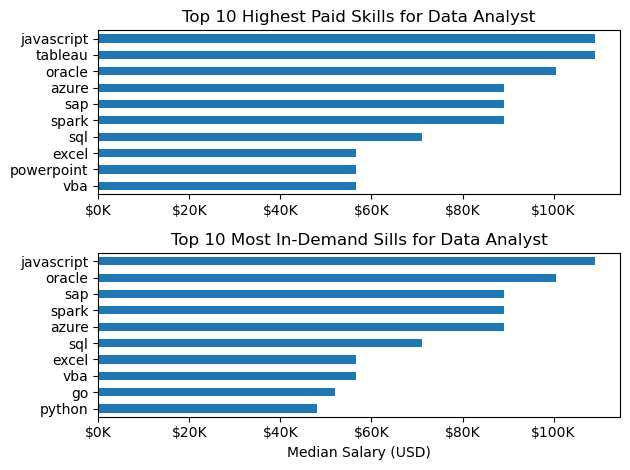

In [30]:
fig,ax = plt.subplots(2,1)

df_da_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))

df_da_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most In-Demand Sills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))

fig.tight_layout()